<a href="https://colab.research.google.com/github/FelipeAngeloSilva/data_science/blob/main/10_Analisando_os_Dados_do_Airbnb_em_Montreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Montreal*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade *Montreal/Canadá*, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados nesta pesquisa foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para a realização desta análise exploratória inicial, será utilizado apenas o seguinte arquivo:
* 'listings.csv' - *Summary information and metrics for listings in Montreal (good for visualisations).*


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

!pip install contextily -q
import contextily as cx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.1 MB/s eta 0:00:00


In [ ]:
# importar o arquivo listings.csv para um DataFrame
montreal = pd.read_csv("https://data.insideairbnb.com/canada/qc/montreal/2024-09-13/visualisations/listings.csv")

## Análise dos Dados

Inicialmente, fez-se necessário compreender como os dados fornecedos estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o anúncio
* `name` - título utilizado no anúncio do imóvel
* `host_id` - número de id da pessoa que está efetuando o anúncio
* `host_name` - nome do anunciante
* `neighbourhood_group` - coluna sem valores válidos
* `neighbourhood`- informa o nome do bairro
* `latitude` - coordenada de latitude do imóvel. SRC: WGS84
* `longitude` - coordenada de longitude do imóvel. SRC: WGS84
* `room_type` - informa qual o espaço do imóvel está sendo anunciado
* `price` - informa o preço da locação do imóvel
* `minimum_nights` - define a quantidade mínima de noites para locação
* `number_of_review` - quantidade de visualizações do anúncio
* `last_review`- data da última visualização do anúncio
* `reviews_per_month` - número médio de avaliações por mês que o anúncio possui.
* `calculated_host_listings_counts` - quantidade de anúncios da mesma pessoa
* `availability_365` - quantidade de dias de disponibilidade em 365 dias
* `number_of_reviews_ltm` - número de visualizações do anúncio nos ultimos 12 meses
* `licence` - número de registro

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
montreal.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2843,Fabulous downtown/airport room,2319,Gail,NaN,Le Sud-Ouest,45.48496,-73.58001,Private room,50.0,31,161,2024-06-14,0.87,4,255,1,NaN
1,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,197.0,31,467,2024-08-17,2.69,2,334,36,"267153, expires: 2025-04-01T00:00:00Z"
2,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,236.0,2,146,2024-08-21,0.95,2,345,20,"267153, expires: 2025-04-01T00:00:00Z"
3,31847,Downtown/Airport room,2319,Gail,NaN,Le Sud-Ouest,45.48467,-73.57995,Private room,40.0,31,193,2022-08-31,1.11,4,262,0,NaN
4,34715,Chez Patrac ! Montreal - Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire home/apt,160.0,31,11,2023-11-14,0.07,1,139,1,"261026, expires: 2024-10-31"


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Em seguida, vamos identificar a quantidade de entradas - ou registros - bem como as variáveis que compõem nossos conjunto de dados.

O arquivo que estamos trabalhando possui **9539 entradas** - representadas pelas linhas quando exibidas no formato tabular - e **18 variáveis** - as colunas.

In [ ]:
# identificar o volume de dados do DataFrame
print(f"Entradas: {montreal.shape[0]}")
print(f"Variáveis: {montreal.shape[1]}")

# verificar os tipos de dados de cada variável
display(montreal.dtypes)

Entradas: 9539
Variáveis: 18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Em uma análise preliminar do conjunto de dados, observamos que aproximadamente 7% das entradas, ou seja, 667 anúncios, apresentam valores ausentes no atributo preço - **"price"**. Esse dado é especialmente relevante, considerando que o preço é um dos principais fatores que motiva um anúncio no Airbnb, dado seu impacto direto na transação monetária entre anfitriões e hóspedes.

Nesta fase inicial de exploração dos dados, optamos por não excluir as entradas com valores ausentes, visto que ainda estamos no processo de familiarização com o conjunto de dados. Em uma análise posterior, medidas como imputação ou exclusão de valores ausentes poderão ser consideradas, dependendo dos objetivos e da abordagem adotada.

Além disso, outros atributos também apresentam uma quantidade significativa de valores ausentes:
* O atributo `neighbourhood_group` está completamente ausente, com 100% dos valores faltando;
* `licence` apresenta cerca de 47% de seus valores ausentes;
* Os atributos `reviews_per_month` e `last_review` apresentam cerca de 19% dos valores ausentes em cada um.

Essas características indicam a necessidade de um tratamento mais detalhado e cuidadoso dos dados ausentes ao longo do processo de análise e modelagem, com a utilização de técnicas apropriadas para lidar com as lacunas nos dados e evitar que isso impacte a qualidade dos resultados da análise.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(montreal.isnull().sum() / montreal.shape[0]).sort_values(ascending=False)

,0
neighbourhood_group,1.000000
license,0.471538
reviews_per_month,0.188699
last_review,0.188699
price,0.069399
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
name,0.000000


In [ ]:
# exibindo as entradas com valores ausentes para a coluna "price"
montreal[montreal["price"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5,36301,Romantic & peaceful Plateau loft,381468,Sylvie,NaN,Le Plateau-Mont-Royal,45.530260,-73.584130,Entire home/apt,NaN,210,52,2024-08-31,0.46,7,10,3,NaN
57,500701,Amazing loft in Montreal downtown,2470535,Valerie,NaN,Le Sud-Ouest,45.480040,-73.581130,Entire home/apt,NaN,31,327,2023-10-29,2.22,1,0,2,NaN
81,700477,L'Escale Waverly,3593341,Elise,NaN,Le Plateau-Mont-Royal,45.524350,-73.598520,Entire home/apt,NaN,32,23,2024-07-12,0.17,1,65,2,NaN
85,728677,Big house near subway,3781413,Karine,NaN,Ahuntsic-Cartierville,45.548420,-73.665320,Entire home/apt,NaN,31,17,2023-06-24,0.15,1,0,0,NaN
86,739882,Grand logement a aire ouverte,3870879,Karine,NaN,Mercier-Hochelaga-Maisonneuve,45.542530,-73.542610,Entire home/apt,NaN,31,25,2024-08-12,0.18,1,0,2,"312538, expires: 2025-04-30"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9060,1213379261104504153,Sud West Modern Montreal Apartment,20446156,Marceline,NaN,Le Sud-Ouest,45.472360,-73.585239,Entire home/apt,NaN,2,1,2024-08-10,0.86,1,180,1,"314523, expires: 2025-07-24"
9137,1215406943171672739,Not for picky guests! Read the Rule,148205710,Kathryn,NaN,Saint-Laurent,45.509606,-73.685087,Private room,NaN,1,8,2024-09-03,7.50,7,0,8,"308725, expires: 2025-07-24T22:40:21Z"
9159,1215880897051473490,The Little Prince Rooms Old MTL,594097140,Kevin,NaN,Ville-Marie,45.497400,-73.553610,Private room,NaN,1,1,2024-08-19,1.00,27,77,1,"318987, expires: 2025-07-02"
9249,1220245264376456898,"Quite, cozy room",357753700,Murshida,NaN,Ville-Marie,45.538375,-73.558221,Private room,NaN,31,0,NaN,NaN,1,0,0,NaN


### **Q3. Qual o tipo de distribuição das variáveis?**

A distribuição das variáveis numéricas pode ser visualizada de forma clara através de um histograma, que são gráficos que exibem a frequência de ocorrência dos valores em intervalos.
Esse tipo de representação dos dados permite identificar padrões, como a presença de distribuições simétricas ou enviesadas, além de indicar a incidência de outliers. Dessa forma, proporciona uma ferramenta valiosa para a análise exploratória dos dados.

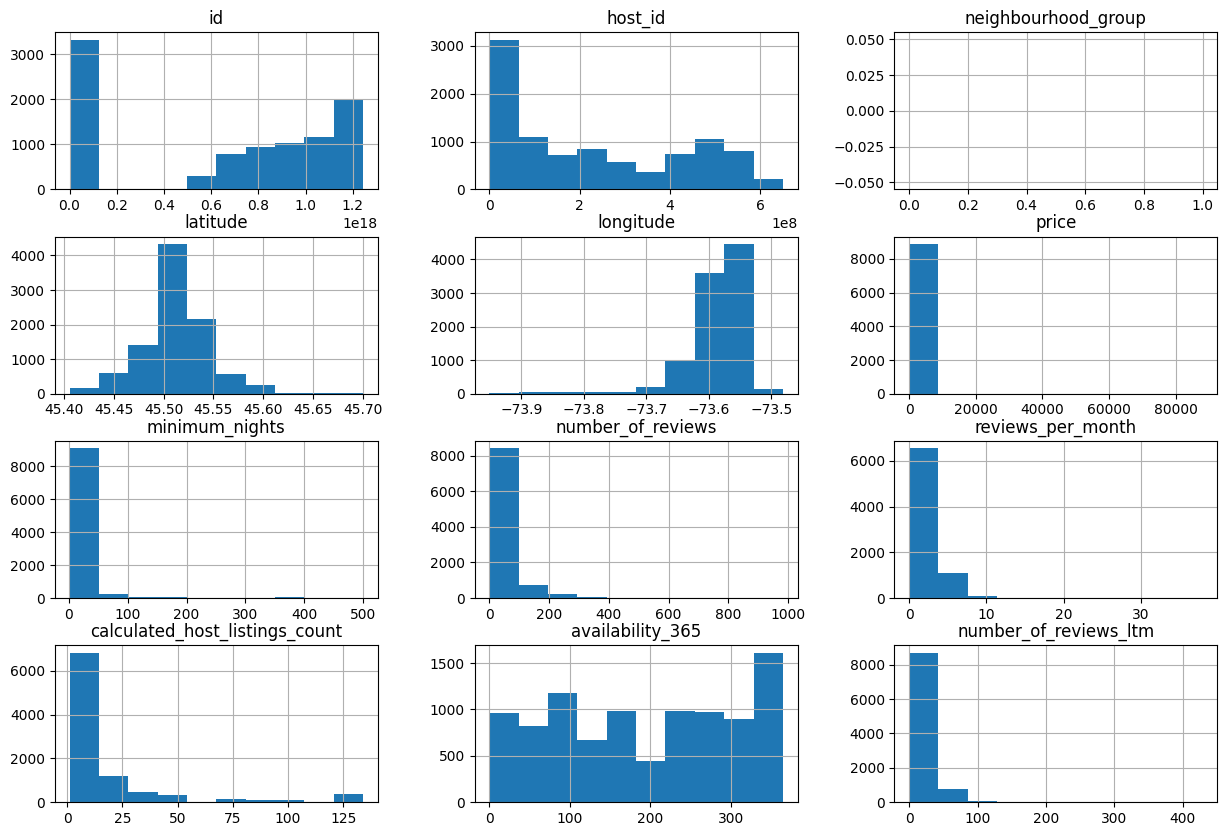

In [ ]:
# plotar o histograma das variáveis numéricas
montreal.hist(figsize = (15, 10));

Conforme a distribuição do histograma, é possível notar a possibilidade de outliers nos atributos `price` e `minimum_nights`.

os valores estão distribuidos em uma faixa muito ampla, distorcendo, dessa forma, a representação gráfica desses atributos.

Para inspecionar a presença de outliers, será utilizado o método `describe()` - que exibe o resumo estatístico da `Series`ou de todo o `DataFrame` - bem como a exibição através do gráfico `boxplots`.

In [ ]:
# Inspecionando o atributo "price" através do método describe
montreal.price.describe()

,price
count,8877.000000
mean,181.627464
std,967.027050
min,14.000000
25%,84.000000
50%,127.000000
75%,196.000000
max,88112.000000


Através do resumo estatístico, podemos observar a influência de valores outliers, pois:
* O valor da média (`mean`) está significativamente acima do 2º quartil - `mediana`.
* Esta variável possui 75% dos valores abaixo de C$ 196,00. Sendo que o valor máximo desta variável é de 88.112,00.

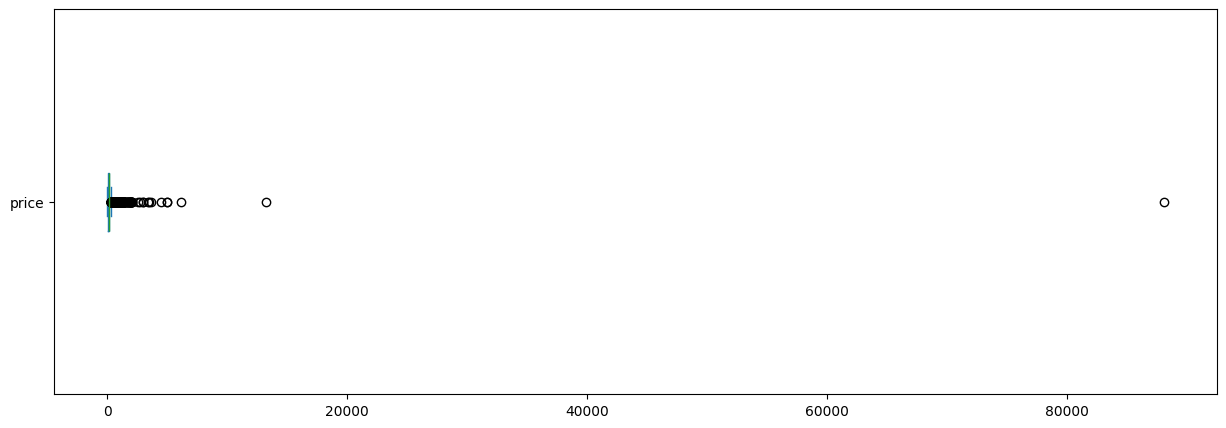

price: valores acima de c$ 400,00
Entradas: 412
Porcentagem: 4.32%


In [ ]:
# Exibindo os valores através de um boxplot
montreal.price.plot(kind = "box", vert = False, figsize = (15, 5))
plt.show()

# Inspecionar a quantidade de valores que estão acima de c$ 400,00
print("price: valores acima de c$ 400,00")
print(f"Entradas: {len(montreal[montreal.price > 400])}")
print(f"Porcentagem: {len(montreal[montreal.price > 400]) / montreal.shape[0] * 100:.2f}%")

O gráfico `boxplot` para a coluna price permite observar a presença dos outliers de forma mais intuitiva.

In [ ]:
# Inspecionando o atributo "minimum_nights" com o método describe
montreal.minimum_nights.describe()

,minimum_nights
count,9539.000000
mean,23.171716
std,35.074624
min,1.000000
25%,2.000000
50%,31.000000
75%,31.000000
max,500.000000


O atributo de `minimum_nights` também apresenta valores outliers, pois:
* A média (`mean`) e o 2º quartil (`50%`) apresentam valores distantes;
* Do conjunto dos dados, 75% dos anuncios exigem valores mínimos de até 31 noites. Enquanto o maior valor do conjunto de dados é de 500 noites.

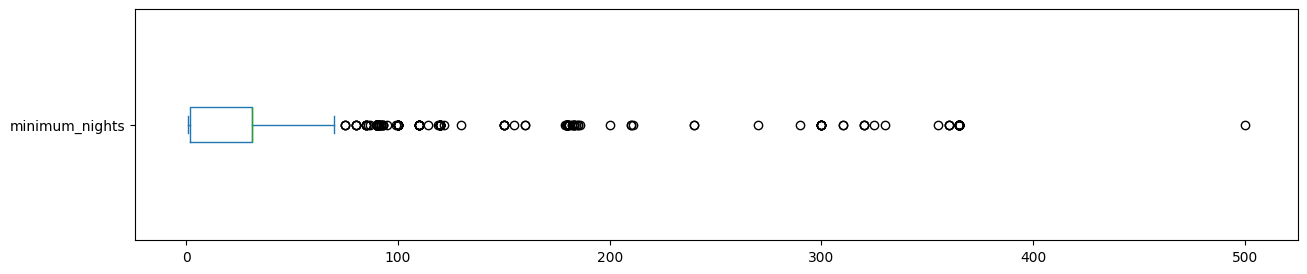

minimun_nights: valores acima de 31 noites
Entradas: 1314
13.78%


In [ ]:
# minimun_nights
montreal.minimum_nights.plot(kind = "box", vert = False, figsize = (15, 3))
plt.show()

# Quantidade de dados acima de 31 noites
print("minimun_nights: valores acima de 31 noites")
print(f"Entradas: {len(montreal[montreal.minimum_nights > 31])}")
print(f"{(len(montreal[montreal.minimum_nights > 31]) / montreal.shape[0]) * 100:.2f}%")

### **Q4. Qual a média dos preços de aluguel?**

Para determinar a média dos preços, precisamos remover os outliers, uma vez que estão interferindo no resultado. Como ponto de corte, vamos utilizar de forma arbitrária os imóveis que possuem valores de `price` acima de 400, correspondendo a 4.32% dos dados, bem como os que possuem valores de `minimum_nights` acima de 31.

Vamos aproveitar e remover também os dados ausentes para a coluna `price`, Mesmo que não influenciem no cálculo da média, pois conforme visto no método `describe()` levou em consideração apenas 8877 dados - ou seja, os que possuem vlores válidos - sendo que o total de linhas é de 9539.

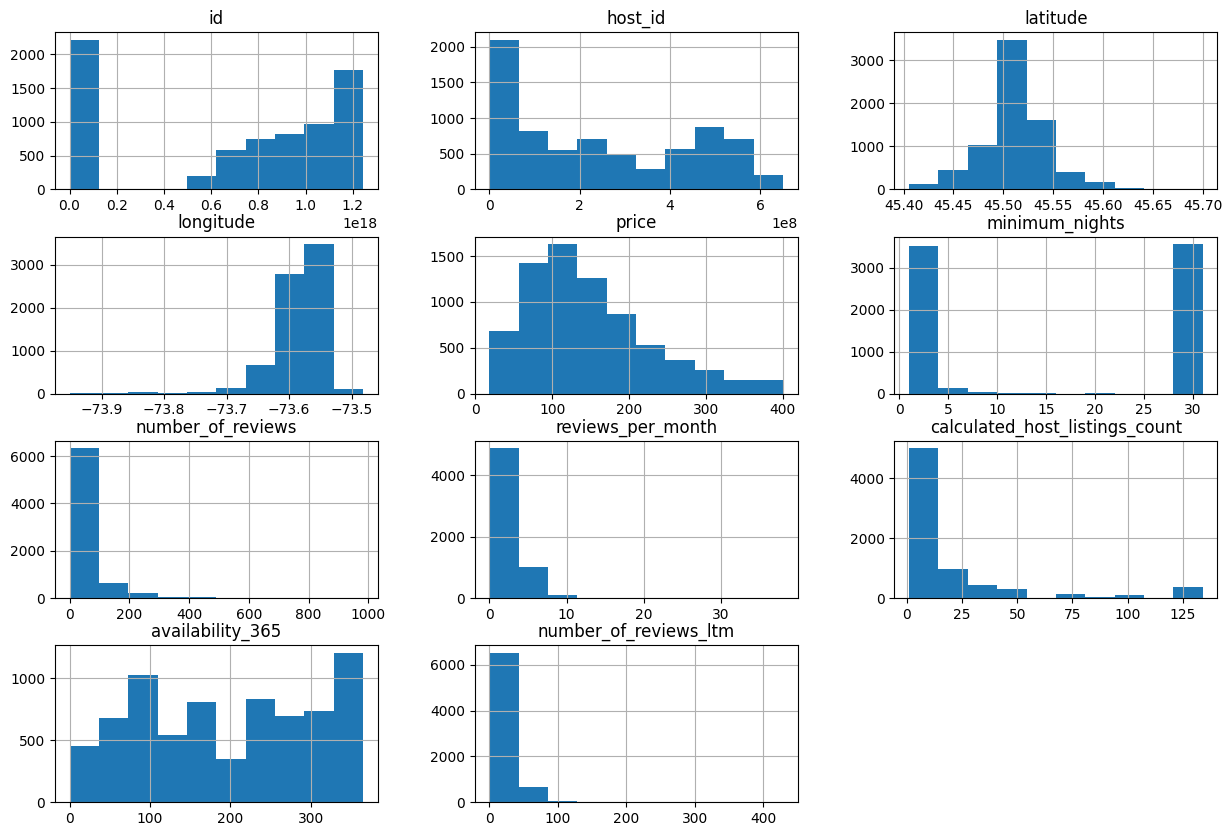

In [ ]:
# Removendo os outliers em um novo DataFrame
montreal_clean = montreal.copy()
montreal_clean.drop(montreal_clean[montreal_clean.price > 400].index, axis = 0, inplace = True)
montreal_clean.drop(montreal_clean[montreal_clean.minimum_nights > 31].index, axis = 0, inplace = True)
montreal_clean.dropna(subset = ["price"], inplace = True)

# Removendo o atributo "neighbourhood_group", uma vez que está sem valores
montreal_clean.drop("neighbourhood_group", axis = 1, inplace = True)

# Plotando novo Histograma para as variáveis numéricas
montreal_clean.hist(figsize = (15, 10));

In [ ]:
# Verificando o tamanho do novo DataFrame.
print(f"Quantidade de entradas: {montreal_clean.shape[0]}")
print(f"Quantidade de variáveis: {montreal_clean.shape[1]}")

Quantidade de entradas: 7306
Quantidade de variáveis: 17


In [ ]:
# Veriricando o resumo estatístico do novo DataFrame, somente das duas vaariáveis.
montreal_clean[["price", "minimum_nights"]].describe()

,price,minimum_nights
count,7306.000000,7306.000000
mean,147.320832,16.082809
std,80.170486,14.609444
min,18.000000,1.000000
25%,88.000000,2.000000
50%,130.000000,5.500000
75%,192.000000,31.000000
max,400.000000,31.000000


In [ ]:
# ver a média da coluna `price``
print(f"A média do atributo 'price' é: {montreal_clean.price.mean():.2f}")

A média do atributo 'price' é: 147.32


Após a remoção dos valores, a diferença entre a média (`mean`) e a mediana (`50%`) referente ao atributo `price` está mais proxima em relação ao DataFrame original.

In [ ]:
# Extraindo todas as veriáveis numericas do DataFrame e convertendo em lista
variaveis = list(montreal_clean.columns)
print(variaveis)

['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']


Utilizaremos esta lista para construir a matriz de correlação.

A correlação demonstra se existe uma relação entre duas variáveis e o grau dessa relação.

In [ ]:
# criar uma matriz de correlação
corr = montreal_clean[['price',
                       'minimum_nights',
                       'latitude',
                       'longitude',
                       'number_of_reviews',
                       'reviews_per_month',
                       'calculated_host_listings_count',
                       'availability_365',
                       'number_of_reviews_ltm']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,latitude,longitude,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.258347,-0.021111,0.092225,0.130375,0.193146,0.010000,0.035668,0.190897
minimum_nights,-0.258347,1.000000,0.004766,-0.069434,-0.244103,-0.464935,0.165823,0.174804,-0.406514
latitude,-0.021111,0.004766,1.000000,0.322352,0.040032,0.005018,-0.071898,-0.006093,0.026065
longitude,0.092225,-0.069434,0.322352,1.000000,0.017878,0.056325,0.082469,0.005542,0.039124
number_of_reviews,0.130375,-0.244103,0.040032,0.017878,1.000000,0.446330,-0.104525,-0.075626,0.681099
reviews_per_month,0.193146,-0.464935,0.005018,0.056325,0.446330,1.000000,-0.066759,-0.116211,0.790226
calculated_host_listings_count,0.010000,0.165823,-0.071898,0.082469,-0.104525,-0.066759,1.000000,0.065075,-0.097910
availability_365,0.035668,0.174804,-0.006093,0.005542,-0.075626,-0.116211,0.065075,1.000000,-0.118768
number_of_reviews_ltm,0.190897,-0.406514,0.026065,0.039124,0.681099,0.790226,-0.097910,-0.118768,1.000000


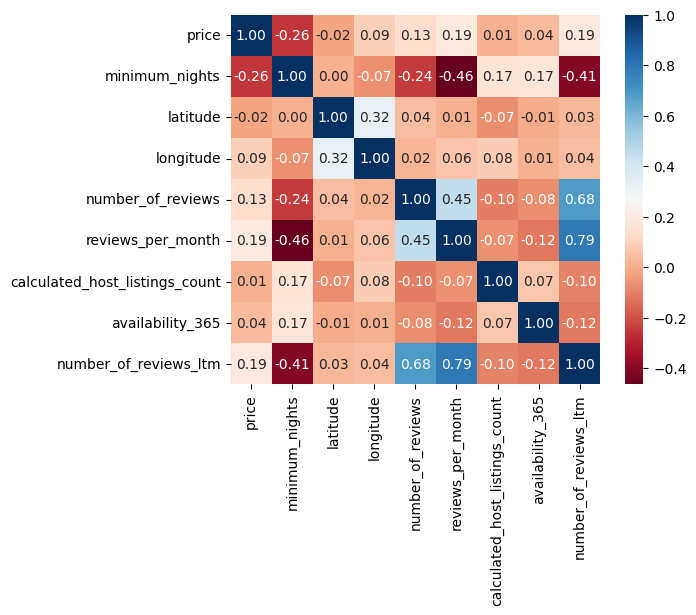

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,
            cmap = "RdBu",
            fmt = ".2f",
            square = True,
            linecolor = "white",
            annot = True);

A matriz de correlação apresentou que resultados de interação de intensidade fraca entre as variáveis, indicando pouca influência que uma exerce sobre a outra.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` indica o tipo de imóvel que está disponível para locação, sendo disponibilizados casa/apartamento inteiro, o aluguel de um quarto, dividir o quarto com outra pessoa ou um quarto de hotel.

Podemos agrupar esses valores e contabilizá-los através do método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
montreal_clean.room_type.value_counts()

,count
room_type,
Entire home/apt,6010
Private room,1229
Shared room,54
Hotel room,13


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
montreal_clean.room_type.value_counts() / montreal_clean.shape[0]

,count
room_type,
Entire home/apt,0.822612
Private room,0.168218
Shared room,0.007391
Hotel room,0.001779


Na cidade de Montreal, 82% dos imóveis que estão sendo anunciados no Airbnb são locação de casa/apartamento inteiro. Seguido de 17% de locacão de quarto.

### **Q6. Qual a localidade mais cara de Montreal?**

A averiguação da localidade com os valores mais elevados pode ser feita através método `groupby`, utilizando a média de `price` dos imóveis em cada bairro - `neighbourhood` - de Montreal.



In [ ]:
# ver preços por bairros, na média
montreal_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending = False)[:10]

,price
neighbourhood,
L'Île-Bizard-Sainte-Geneviève,221.250000
Montréal-Est,195.250000
Westmount,180.676471
Le Plateau-Mont-Royal,170.316537
Dorval,166.545455
Ville-Marie,163.282422
Outremont,160.811321
Pointe-Claire,142.136364
Pierrefonds-Roxboro,141.612903


Vamos inspecionar a quantidade de tipo de imóveis que estão para locação por bairro da cidade de Montreal. Para isso, será utilizado o método `crosstab()` da biblioteca `pandas`. O `crosstab()` se destaca pela simplicidade de código para a construção de uma tabela de contingência, ou tabela cruzada.

Este resultado também poderia ser obtido pelo método `groupby()`, sendo necessário mais código.

In [ ]:
# Média do valor de preço de locação para tipo de imóvel, distinguido por bairro
price = pd.crosstab(montreal_clean.neighbourhood,
                    montreal_clean.room_type,
                    values = montreal_clean.price,
                    margins = True,
                    margins_name = "Value_mean_total",
                    aggfunc = "mean").sort_values(by = "Value_mean_total", ascending = False)[:11]

price = price.drop("Value_mean_total", axis = 0)
price

room_type,Entire home/apt,Hotel room,Private room,Shared room,Value_mean_total
neighbourhood,,,,,
L'Île-Bizard-Sainte-Geneviève,221.250000,NaN,NaN,NaN,221.250000
Montréal-Est,195.250000,NaN,NaN,NaN,195.250000
Westmount,196.900000,NaN,61.666667,51.000000,180.676471
Le Plateau-Mont-Royal,185.007692,NaN,99.087963,54.281250,170.316537
Dorval,167.500000,NaN,165.400000,NaN,166.545455
Ville-Marie,167.501976,227.615385,129.840637,55.368421,163.282422
Outremont,177.911111,NaN,64.625000,NaN,160.811321
Pointe-Claire,157.277778,NaN,74.000000,NaN,142.136364
Pierrefonds-Roxboro,152.629630,NaN,67.250000,NaN,141.612903


In [ ]:
# Inspecionando o percentual da tipo de imóveis por bairro, sendo cada tipo de imóvel em uma coluna
pd.crosstab(montreal_clean.neighbourhood,
            montreal_clean.room_type,
            normalize = "columns",
            margins = True,
            margins_name = "Total").mul(100).round(2).sort_values(by = "Total", ascending = False)

room_type,Entire home/apt,Hotel room,Private room,Shared room,Total
neighbourhood,,,,,
Ville-Marie,37.89,100.0,20.42,35.19,35.04
Le Plateau-Mont-Royal,21.63,0.0,17.58,59.26,21.19
Le Sud-Ouest,6.89,0.0,14.24,0.00,8.06
Côte-des-Neiges-Notre-Dame-de-Grâce,6.76,0.0,12.69,0.00,7.69
Mercier-Hochelaga-Maisonneuve,5.84,0.0,11.72,0.00,6.78
Rosemont-La Petite-Patrie,6.87,0.0,4.07,1.85,6.35
Villeray-Saint-Michel-Parc-Extension,3.09,0.0,4.07,0.00,3.23
Ahuntsic-Cartierville,1.88,0.0,2.85,0.00,2.03
Verdun,1.73,0.0,2.20,0.00,1.79


Comparando as tabelas acima, apesar de o bairro `L'Île-Bizard-Sainte-Geneviève` possuir apenas *0.05%* dos imóveis, sendo todos os anuncios de apartamento/casa, possui a média de preços mais elevada na cidade de Montreal. Já o bairro `Ville_Marie`, possui 100% dos `Hotel room` anunciados na cidade de Montreal.

Quando verificada a disponibilidade de `Entire home/apt`, os bairros `Ville Marie` e `Le Plateau-Mont-Royal` são os que possuem mais opções.

Visualizar a localização dos imóveis é um fator importante para decidir qual é o mais adequado. Esses dados podem ser facilmente visualizados através da biblioteca `plotly`, que permite a construção de gráficos interativos com poucas linhas de código.

In [ ]:
# plotar os imóveis pela latitude-longitude
fig = px.scatter_map(montreal_clean,
                     lat = "latitude",
                     lon = "longitude",
                     color = "room_type",
                     size = "price",
                     color_continuous_scale = px.colors.cyclical.IceFire,
                     size_max = 15,
                     zoom = 10,
                     map_style = "carto-positron")
fig.show()

Os dados também podem ser exibidos através do método `plot()` da bibioteca pandas, sendo necessário a utilização da `matplotlib` para visualização e da biblioteca `contextily` como provedor do mapa base, desenho do mapa de fundo exibido a representação as feições geográficas da área de interesse.

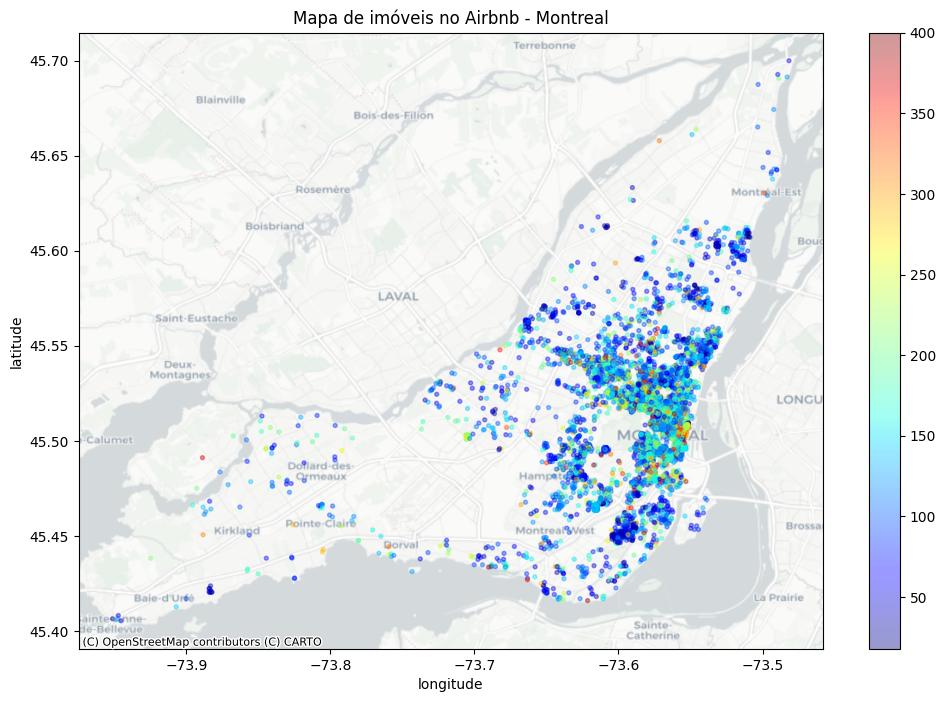

In [ ]:
# plotar os imóveis pela latitude-longitude
fig, ax = plt.subplots(figsize = (12, 8))
montreal_clean.plot(ax = ax,
                    kind = "scatter",
                    x = "longitude",
                    y = "latitude",
                    alpha = 0.4,
                    c = montreal_clean["price"],
                    s = 8,
                    cmap = plt.get_cmap("jet"))

cx.add_basemap(ax,
               crs = "epsg:4326",
               source = cx.providers.CartoDB.Positron)

plt.title("Mapa de imóveis no Airbnb - Montreal")

plt.show()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print(f"A media do atributo minimum_nights é de: {montreal_clean.minimum_nights.mean():.2f}")

A media do atributo minimum_nights é de: 16.08


In [ ]:
pd.crosstab(montreal_clean['neighbourhood'],
            montreal_clean['room_type'],
            values = montreal_clean['minimum_nights'],
            margins = True,
            margins_name = "mean_min_nights",
            aggfunc = 'mean').sort_values(by = 'Entire home/apt', ascending = False)

room_type,Entire home/apt,Hotel room,Private room,Shared room,mean_min_nights
neighbourhood,,,,,
L'Île-Bizard-Sainte-Geneviève,31.000000,NaN,NaN,NaN,31.000000
Baie-d'Urfé,31.000000,NaN,31.000000,NaN,31.000000
Beaconsfield,31.000000,NaN,31.000000,NaN,31.000000
Sainte-Anne-de-Bellevue,31.000000,NaN,31.000000,NaN,31.000000
L'Île-Dorval,31.000000,NaN,NaN,NaN,31.000000
Hampstead,31.000000,NaN,2.000000,NaN,22.714286
Kirkland,31.000000,NaN,NaN,NaN,31.000000
Saint-Laurent,29.742857,NaN,26.500000,NaN,29.079545
Mont-Royal,28.000000,NaN,31.000000,NaN,28.500000


## Conclusões


Os dados iniciais disponibilizados pelo Airbnb, apresentavam algumas entradas com valores ausentes no atributo `price`, bem como outliers para este mesmo atributo e para `minimum_nights`.

Os bairros `Ville-Marie`, `Le Plateau-Mont-Royal` e `Le Sud-Ouest`, são os bairro de Montreal que apresentam maior quantidade de imóveis para locação, sendo que 100% dos `Hotel room` estão concentrados em `Ville-Marie` com valor médio de 227.62.

A média de `minimum_nights` é de *16* noites, sendo que esta média pode variar de acordo com o bairro e com o tipo de imóvel, por exemplo:
* Em `Ville-Marie`, a média é de 16 noites para `Entire home/apt`, 01 noite para	`Hotel room`, 11 noites para	`Private room` e 03 noites para	`Shared room`.
* Em `Côte-des-Neiges-Notre-Dame-de-Grâce` 14 noites para `Entire home/apt` e 23 noites para `Private room`.

Importante destacar que este conjunto de dados representa uma versão condensada, apropriada apenas para uma análise inicial. Para investigações exploratórias mais aprofundadas, recomenda-se o uso do conjunto de dados completo, que disponibiliza 106 atributos, permitindo uma exploração mais abrangente e precisa.